# Fake News Classifier

In [1]:
# Importing Imp Libs

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import re
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
stop = stopwords.words('english')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading csv files

true = pd.read_csv("True.csv")
false = pd.read_csv("Fake.csv")

In [3]:
true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [4]:
false.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

# Exploratory Data Analysis

In [5]:
true.describe()

title  \
count                                               21417   
unique                                              20826   
top     Factbox: Trump fills top jobs for his administ...   
freq                                                   14   

                                                     text       subject  \
count                                               21417         21417   
unique                                              21192             2   
top     (Reuters) - Highlights for U.S. President Dona...  politicsNews   
freq                                                    8         11272   

                      date  
count                21417  
unique                 716  
top     December 20, 2017   
freq                   182

In [6]:
false.describe()

title   text subject  \
count                                               23481  23481   23481   
unique                                              17903  17455       6   
top     MEDIA IGNORES Time That Bill Clinton FIRED His...           News   
freq                                                    6    626    9050   

                date  
count          23481  
unique          1681  
top     May 10, 2017  
freq              46

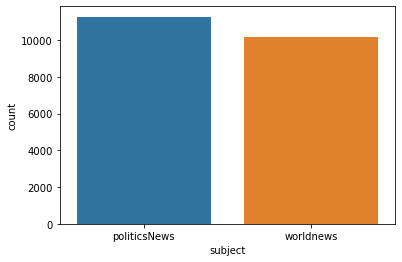

In [7]:
sns.countplot(true.subject)

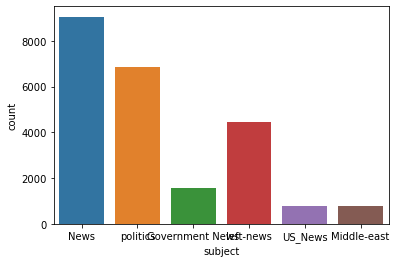

In [8]:
sns.countplot(false.subject)

## Above 2 figures shows the subject column is balanced for real news whereas imbalanced for fake news

In [9]:
# Sepearting the dataset into the different dataframe based on the label column

politics = true[true['subject']=="politicsNews"]
worldnews = true[true['subject']=="worldnews"]
print(politics.shape)
print(worldnews.shape)

(11272, 4)
(10145, 4)


In [10]:
politics_text_len = politics['text'].str.len()
worldnews_text_len = worldnews['text'].str.len()

In [11]:
print("The maximum lenght of string in Politcs news is {} words".format(max(politics_text_len)))
print("The maximum lenght of string in World news is {} words".format(max(worldnews_text_len)))

The maximum lenght of string in Politcs news is 29781 words
The maximum lenght of string in World news is 17999 words


In [12]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\Swapnil
[nltk_data]     Vishwakarma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Swapnil
[nltk_data]     Vishwakarma\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Pre-processing [Tokenization & Removal of Stop Words]

In [3]:
def tokenizeandstopwords(text):
    tokens = nltk.word_tokenize(text)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    meaningful_words = [w for w in token_words if not w in stop]
    joined_words = ( " ".join(meaningful_words))
    return joined_words

In [14]:
politics['text'] = politics['text'].apply(tokenizeandstopwords)
worldnews['text'] = worldnews['text'].apply(tokenizeandstopwords)

# Word Cloud

In [15]:
def generate_word_cloud(text):
    wordcloud = WordCloud(
        width = 300,
        height = 200,
        background_color = 'black').generate(str(text))
    fig = plt.figure(
        figsize = (20, 15),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

### Word Cloud for Politics Label

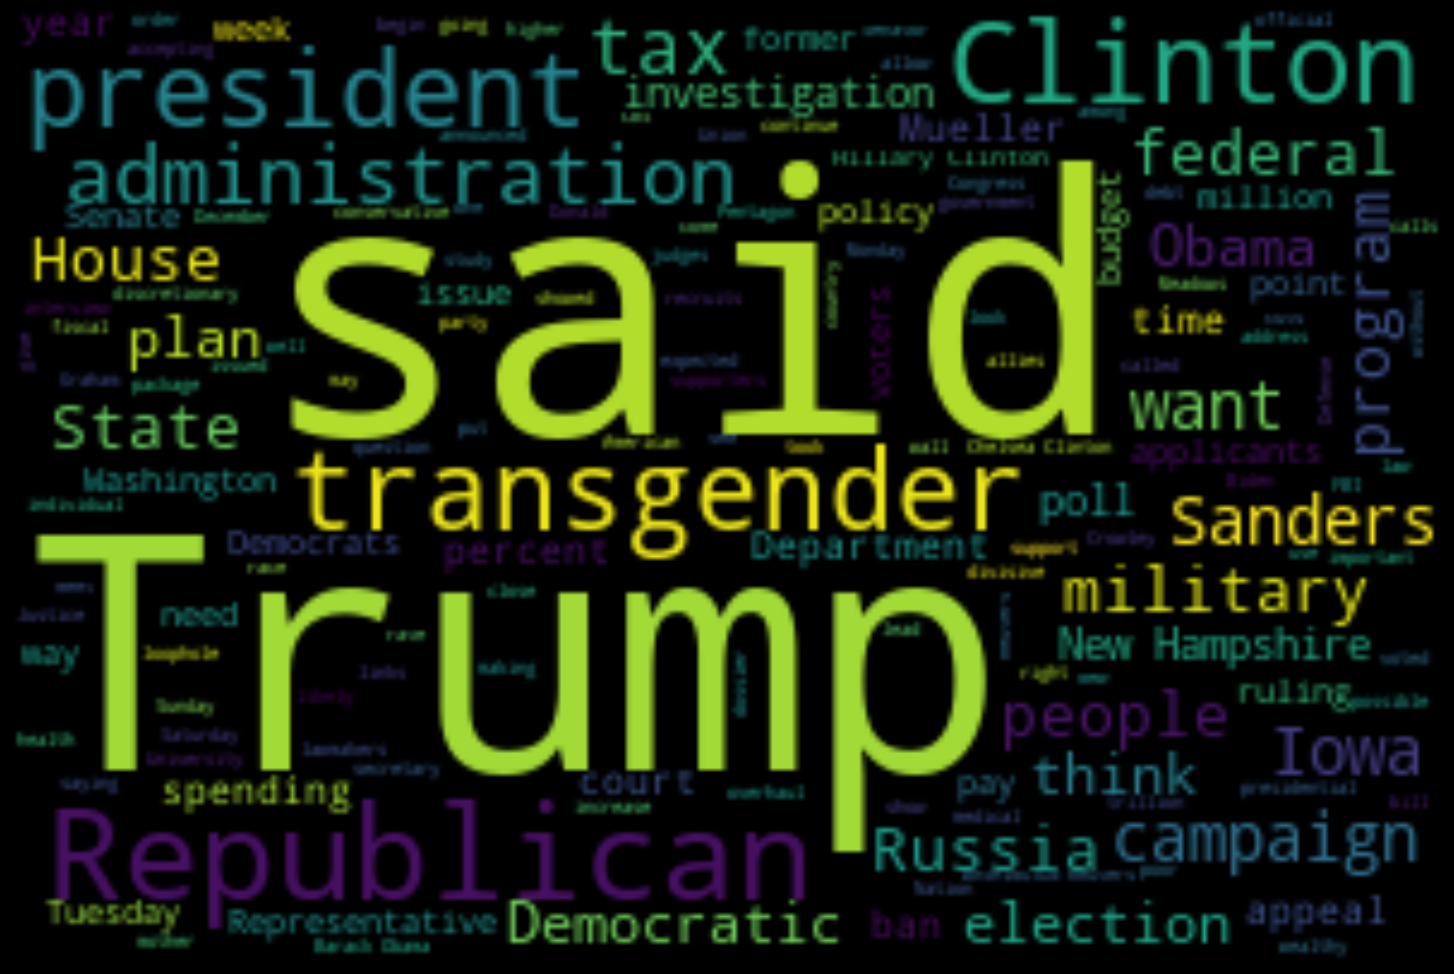

In [16]:
politics_text = politics.text.values
generate_word_cloud(politics_text)

### Word Cloud for World News Label

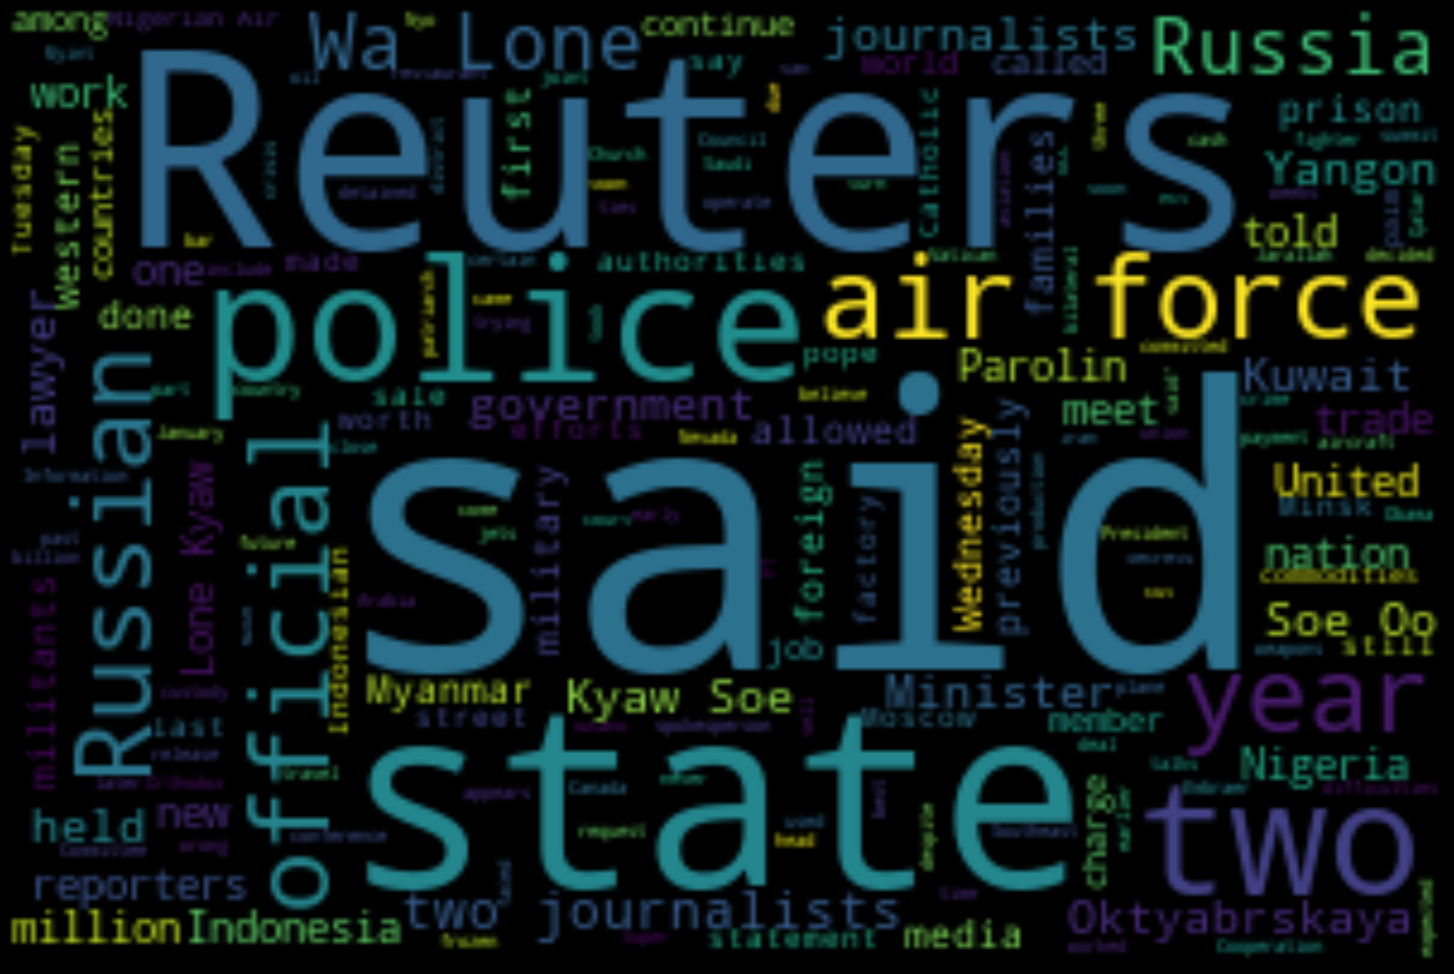

In [17]:
worldnews_text = worldnews.text.values
generate_word_cloud(worldnews_text)

In [18]:
# Seperating the dataset into the different dataframe based on the labels

Government_News = false[false['subject']=="Government News"]
Middle_east = false[false['subject']=="Middle-east"]
News = false[false['subject']=="News"]
US_News = false[false['subject']=="US_News"]
politics = false[false['subject']=="politics"]

In [19]:
Government_News['text'] = Government_News['text'].apply(tokenizeandstopwords)
Middle_east['text'] = Middle_east['text'].apply(tokenizeandstopwords)
News['text'] = News['text'].apply(tokenizeandstopwords)
US_News['text'] = US_News['text'].apply(tokenizeandstopwords)
politics['text'] = politics['text'].apply(tokenizeandstopwords)

### Word Cloud for Goverment News Label (Fake News)

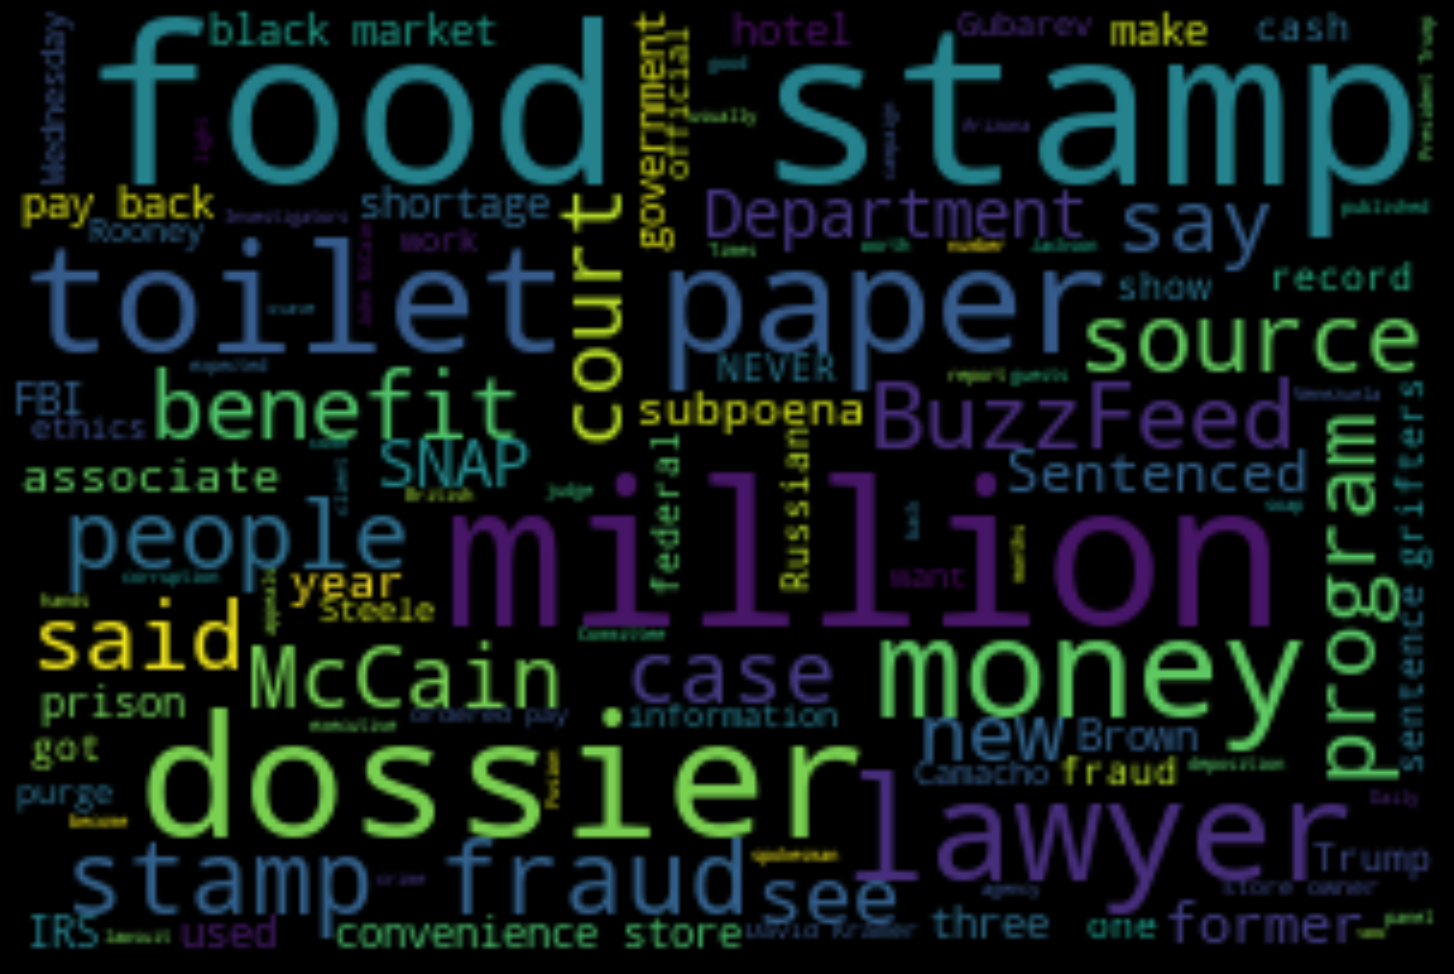

In [20]:
govertment_news_text = Government_News['text'].values
generate_word_cloud(govertment_news_text)

### Word Cloud for Middle-East News Label (Fake News)

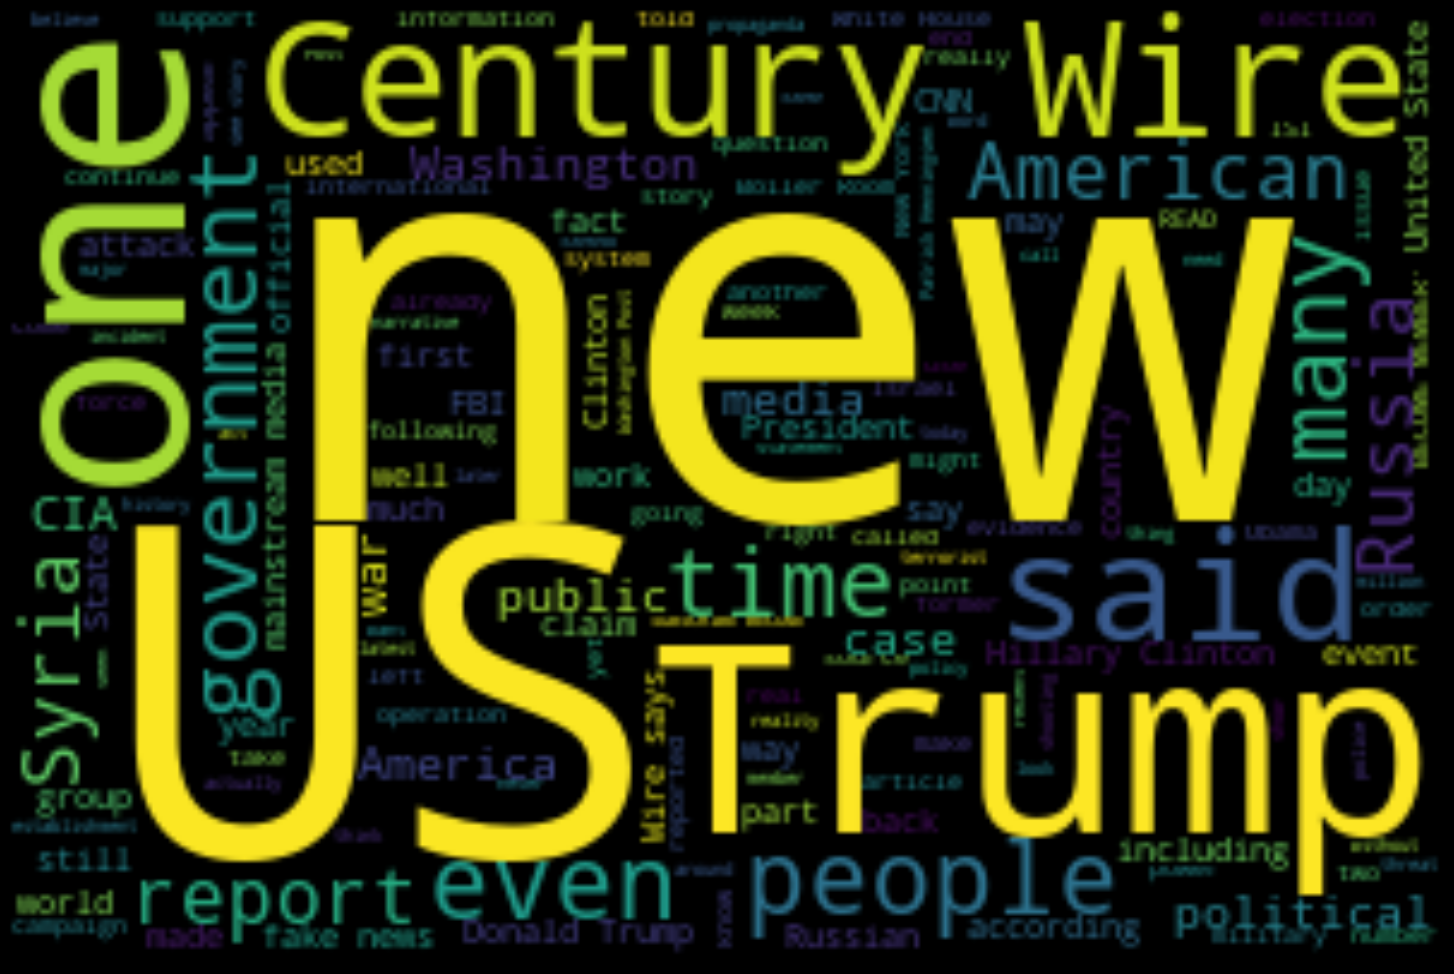

In [21]:
middleast_news_text = Middle_east['text'].values
generate_word_cloud(middleast_news_text)

### Word Cloud for General News Label (Fake News)

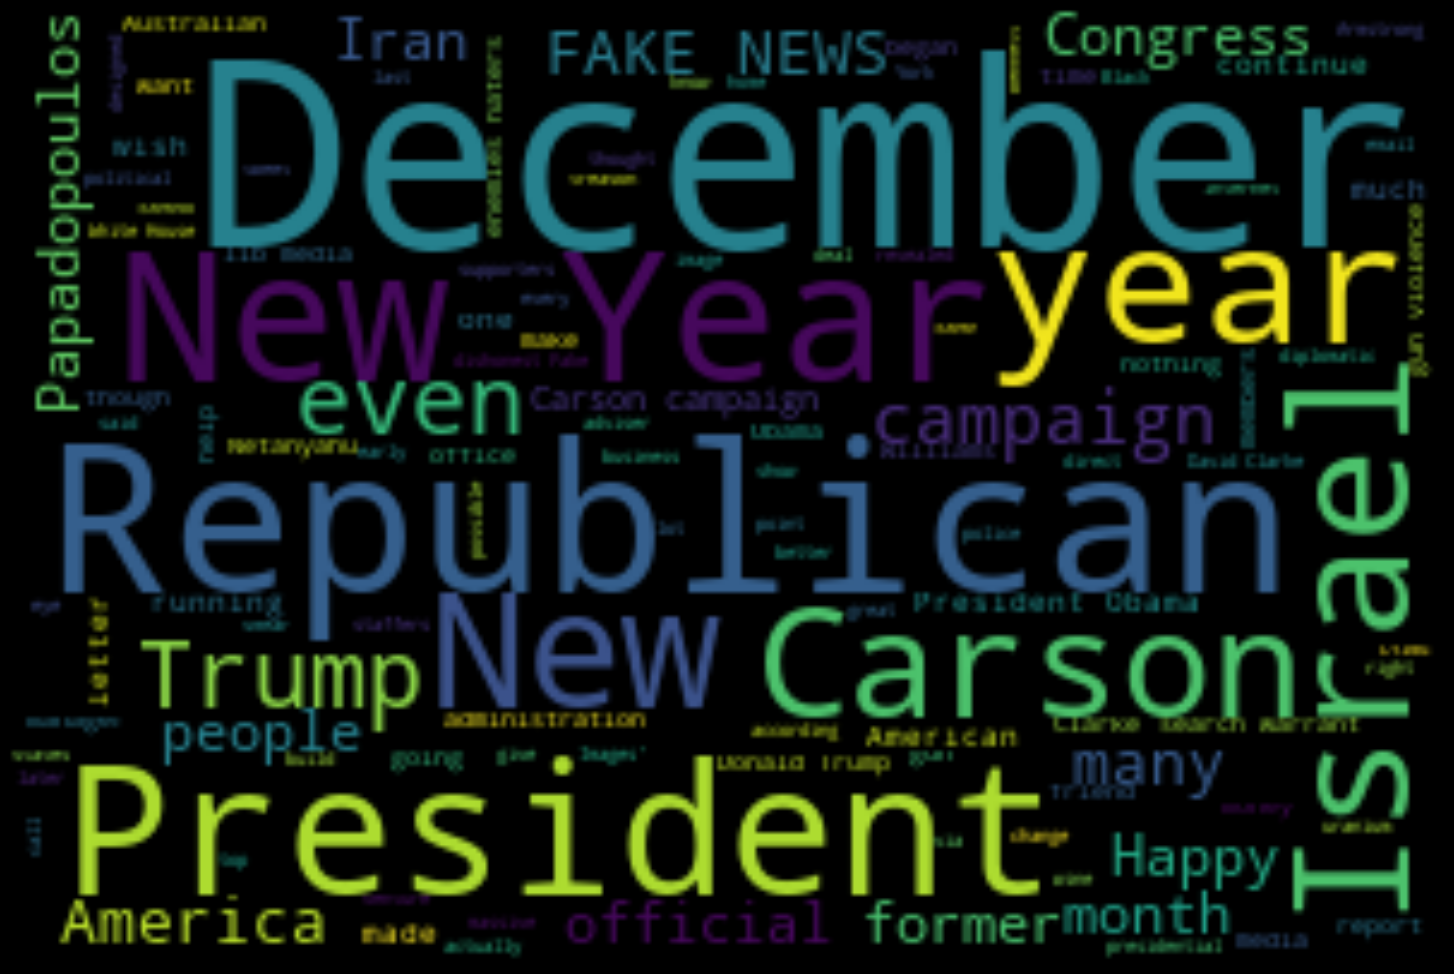

In [22]:
news_text = News['text'].values
generate_word_cloud(news_text)

### Word Cloud for Us News Label (Fake News)

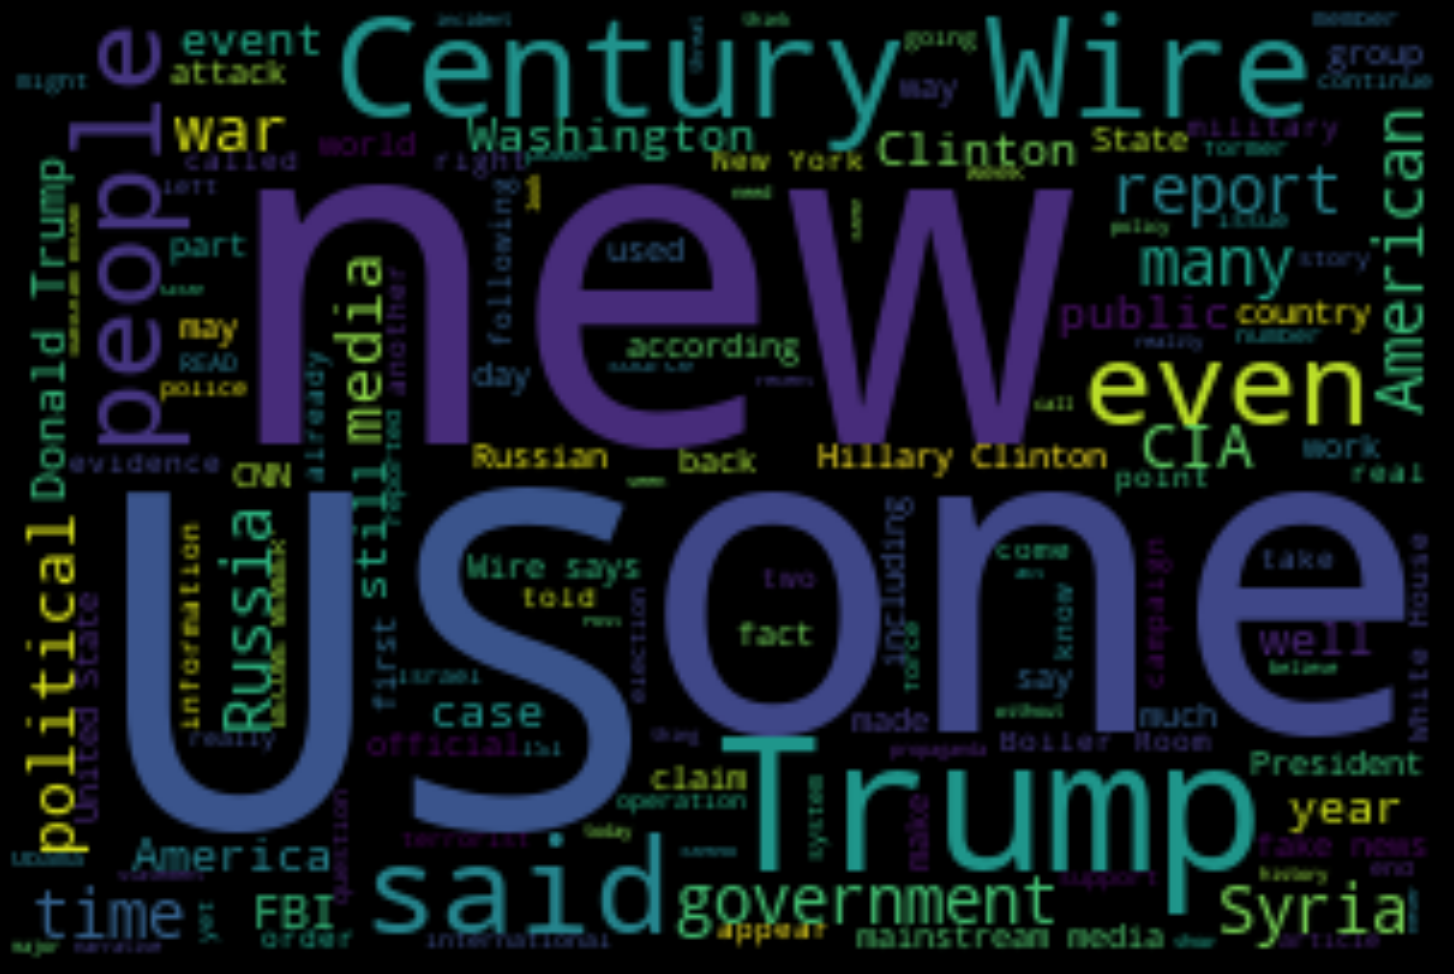

In [23]:
usnews_text = US_News['text'].values
generate_word_cloud(usnews_text)

### Word Cloud for Politics Label (Fake News)

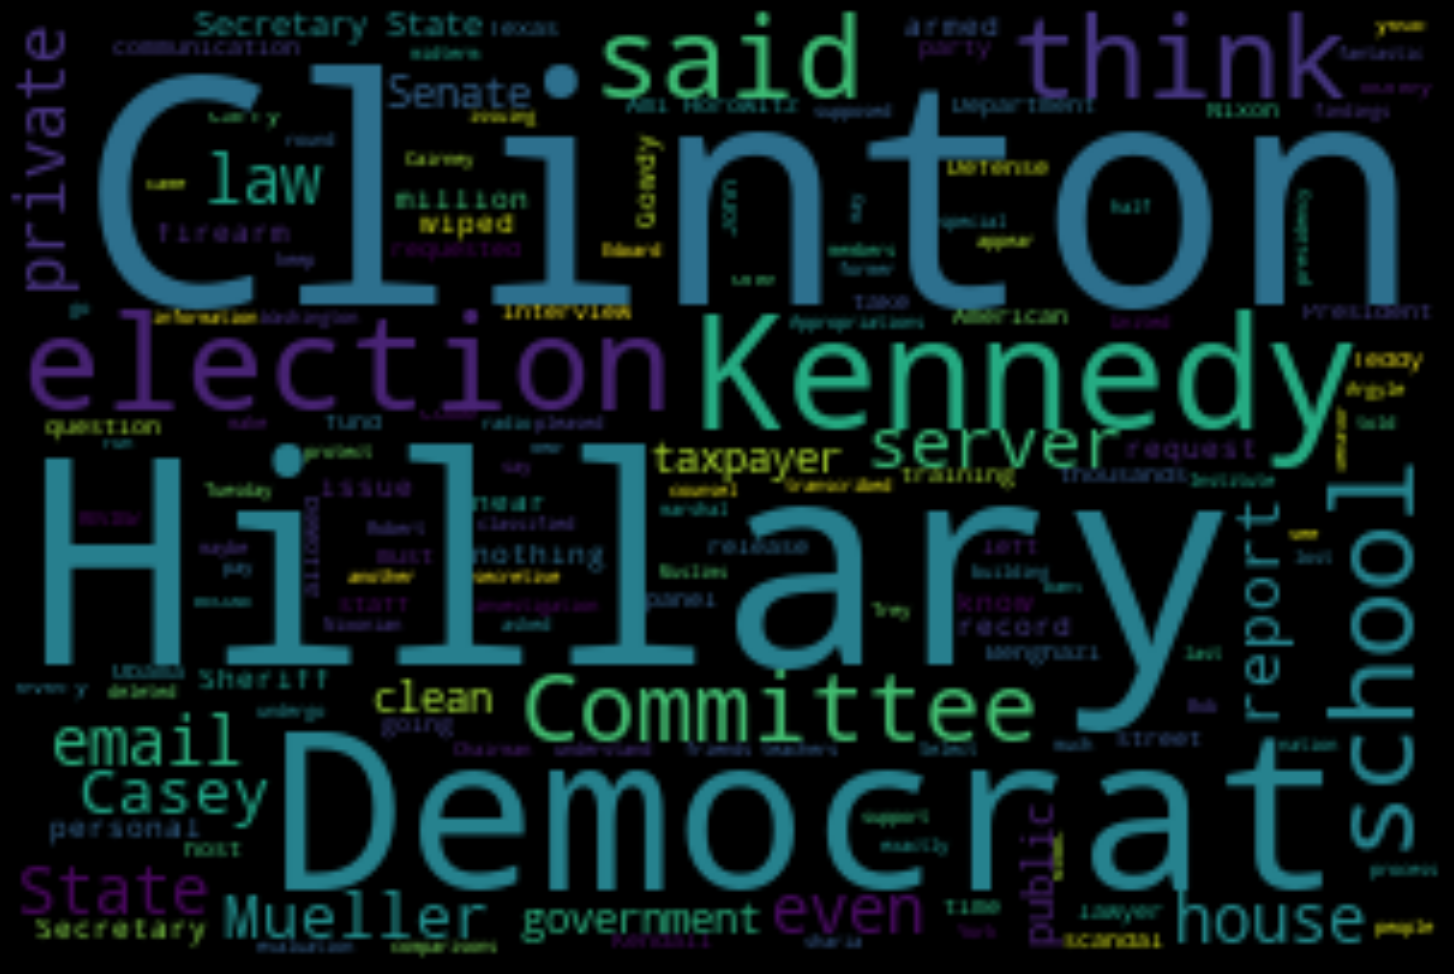

In [24]:
politicsFake_text = politics['text'].values
generate_word_cloud(politicsFake_text)

## Merging Fake and Real News

In [4]:
false['target'] = 'fake'
true['target'] = 'true'
news = pd.concat([false, true]).reset_index(drop = True)
news.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date target  
0  December 31, 2017   fake  
1  December 31, 2017   fake  
2  December 30, 2017   fake  
3  December 29, 2017   fake  
4  December 25, 2017   fake

In [16]:
news.shape

(44898, 5)

In [5]:
news['text'] = news['text'].apply((lambda y:re.sub("http://\S+"," ", y)))
news['text'] = news['text'].apply((lambda x:re.sub("\@", " ",x.lower())))

In [6]:
def basic_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english')
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [29]:
true_word = basic_clean(''.join(str(true['text'].tolist())))

In [30]:
true_bigrams_series = (pd.Series(nltk.ngrams(true_word, 2)).value_counts())[:20]

### True News - Bigram

Text(0.5, 0, '# of Occurances')

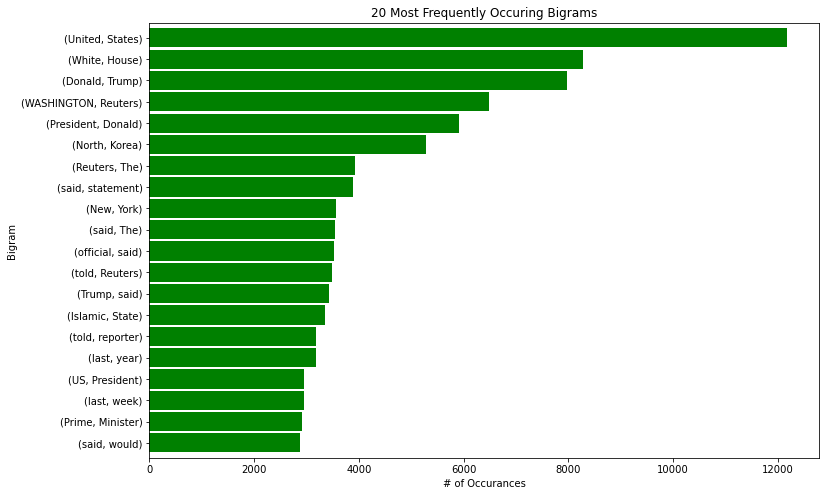

In [31]:
true_bigrams_series.sort_values().plot.barh(color='green', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

### True News - Trigram

Text(0.5, 0, '# of Occurances')

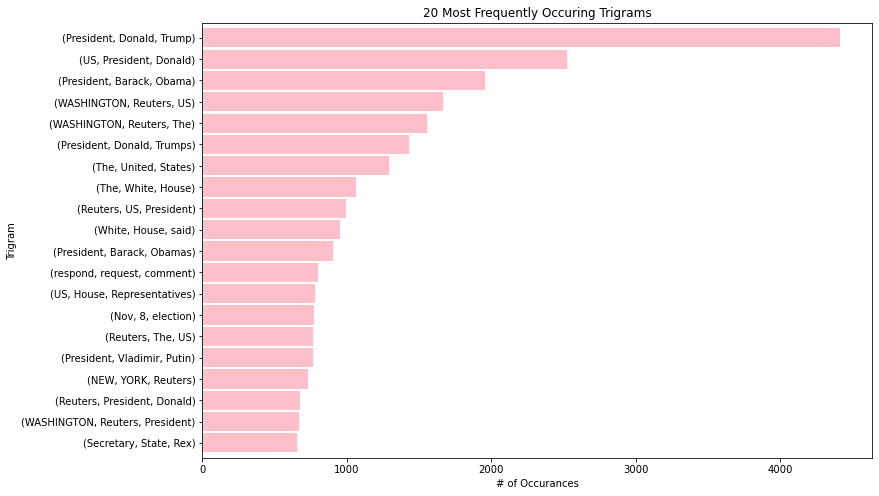

In [32]:
true_trigrams_series = (pd.Series(nltk.ngrams(true_word, 3)).value_counts())[:20]
true_trigrams_series.sort_values().plot.barh(color='pink', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

In [33]:
false_word = basic_clean(''.join(str(false['text'].tolist())))

In [34]:
flase_bigrams_series = (pd.Series(nltk.ngrams(false_word, 2)).value_counts())[:20]

### Fake News - Bigram

Text(0.5, 0, '# of Occurances')

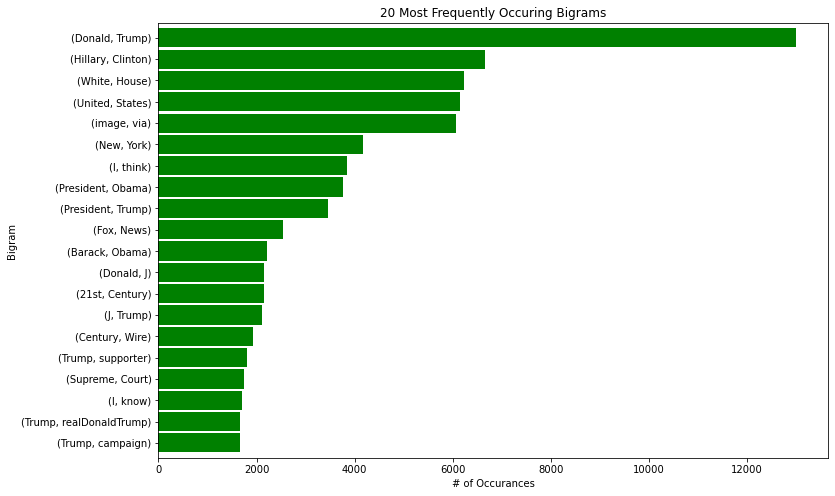

In [35]:
flase_bigrams_series.sort_values().plot.barh(color='green', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

### Fake News - Trigram

Text(0.5, 0, '# of Occurances')

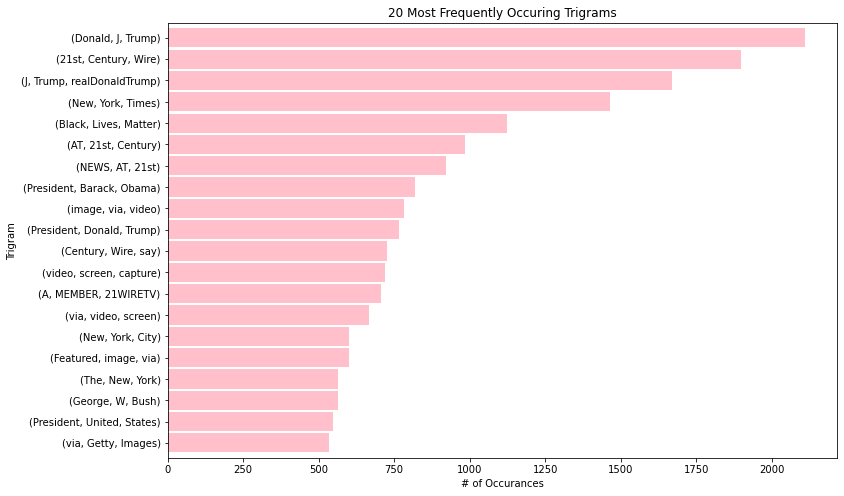

In [36]:
false_trigrams_series = (pd.Series(nltk.ngrams(false_word, 3)).value_counts())[:20]
false_trigrams_series.sort_values().plot.barh(color='pink', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

In [37]:
words = basic_clean(''.join(str(news['text'].tolist())))

In [38]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:20]

### Full Data - Bigram

Text(0.5, 0, '# of Occurances')

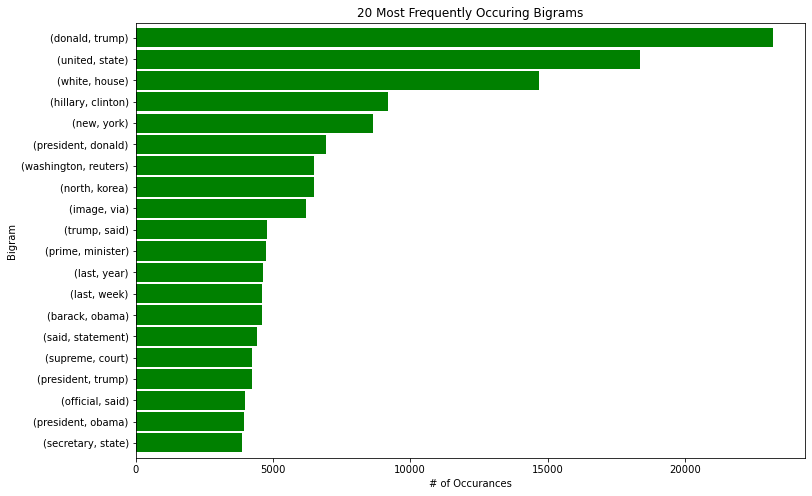

In [39]:
bigrams_series.sort_values().plot.barh(color='green', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

In [40]:
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:20]

### Full Data - Trigram

Text(0.5, 0, '# of Occurances')

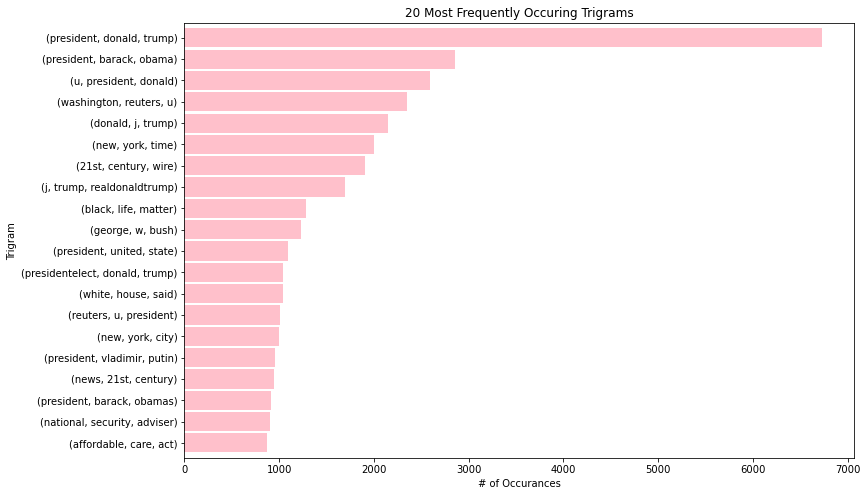

In [41]:
trigrams_series.sort_values().plot.barh(color='pink', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

# Logistic Regression

In [7]:
x_train,x_test,y_train,y_test = train_test_split(news['text'], news.target, test_size=0.2, random_state=2020)

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("Accuracy of Logistic Regression: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

Accuracy of Logistic Regression: 98.76%


In [8]:
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[4674   66]
 [  45 4195]]
              precision    recall  f1-score   support

        fake       0.99      0.99      0.99      4740
        true       0.98      0.99      0.99      4240

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



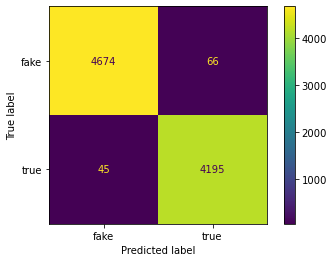

In [9]:
plot_confusion_matrix(model, x_test, y_test)

In [10]:
import pickle

In [44]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [45]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9876391982182628


In [11]:
from sklearn import svm

# svm = svm.SVC(n_estimators= 10, random_state= 0)
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', svm.SVC())])

svm_model = pipe.fit(x_train, y_train)
prediction = svm_model.predict(x_test)
print("Accuracy of SVM: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

Accuracy of SVM: 99.44%


In [12]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators= 10, random_state= 0)
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier())])

rf_model = pipe.fit(x_train, y_train)
prediction = rf_model.predict(x_test)
print("Accuracy of Random Forest Classifier: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

Accuracy of Random Forest Classifier: 98.98%


In [13]:
filename = 'svm_model.sav'
pickle.dump(svm_model, open(filename, 'wb'))

In [14]:
filename = 'rf_model.sav'
pickle.dump(rf_model, open(filename, 'wb'))